In [2]:
#!pip install catboost
#!pip install --upgrade optuna numpy
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.1

In [1]:
import optuna
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import metrics
import matplotlib.pyplot as plt
import catboost as cb
from catboost import CatBoostRegressor
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error


In [3]:
data_clean_imprt=pd.read_csv("data_clean.csv",  delimiter=',')



In [4]:
data_clean_imprt.head(15)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,4.727388,6.461468,6.091310,6.985642,7.412764,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.360741,5,1.945910,0.000000,6.150603,5.602119,6.783325,6.799056,...,False,False,False,True,False,False,False,False,True,False
2,3.044522,4.406719,9.565775,6,1.945910,4.691348,6.828712,6.008813,7.192934,7.192934,...,False,False,False,True,False,False,False,False,True,False
3,3.044522,4.543295,9.320181,7,1.791759,0.000000,6.971669,6.952729,7.654917,7.654917,...,False,False,False,True,False,False,False,False,True,False
4,4.110874,4.317488,9.534668,5,1.791759,0.000000,6.674561,4.927254,6.834109,6.834109,...,False,False,False,True,False,False,False,False,True,False
5,4.110874,4.369448,9.208238,6,1.945910,3.044522,6.401917,5.783825,6.831954,6.831954,...,False,False,False,True,False,False,False,False,True,False
6,4.795791,3.737670,8.501267,8,1.791759,0.000000,6.424869,6.583409,7.199678,7.199678,...,False,False,False,True,False,False,False,False,True,False
7,4.795791,3.784190,8.518392,8,1.791759,0.000000,5.575949,6.925595,7.155396,7.155396,...,False,False,False,True,False,False,False,False,True,False
8,4.795791,3.688879,8.592301,8,1.791759,0.000000,7.074117,6.030685,7.375256,7.388328,...,False,False,False,True,False,False,False,False,True,False
9,4.110874,4.110874,8.922792,7,1.791759,0.000000,0.000000,6.902743,6.902743,6.936343,...,False,False,False,True,False,False,False,False,True,False


In [5]:

x=data_clean_imprt.drop('SalePrice',axis=1)
y=data_clean_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
cb_mod = cb.CatBoostRegressor()
cb_mod.fit(x_train, y_train)
cb_pred = cb_mod.predict(x_test)

Learning rate set to 0.046842
0:	learn: 0.3885039	total: 54.4ms	remaining: 54.4s
1:	learn: 0.3768588	total: 60.4ms	remaining: 30.1s
2:	learn: 0.3654295	total: 66.2ms	remaining: 22s
3:	learn: 0.3541678	total: 72ms	remaining: 17.9s
4:	learn: 0.3441996	total: 77.5ms	remaining: 15.4s
5:	learn: 0.3342699	total: 83.2ms	remaining: 13.8s
6:	learn: 0.3249641	total: 88.7ms	remaining: 12.6s
7:	learn: 0.3164636	total: 94.3ms	remaining: 11.7s
8:	learn: 0.3087653	total: 100ms	remaining: 11s
9:	learn: 0.3004461	total: 106ms	remaining: 10.5s
10:	learn: 0.2925048	total: 112ms	remaining: 10s
11:	learn: 0.2847234	total: 118ms	remaining: 9.69s
12:	learn: 0.2774849	total: 123ms	remaining: 9.37s
13:	learn: 0.2704139	total: 133ms	remaining: 9.37s
14:	learn: 0.2639786	total: 145ms	remaining: 9.54s
15:	learn: 0.2576991	total: 157ms	remaining: 9.66s
16:	learn: 0.2515154	total: 163ms	remaining: 9.41s
17:	learn: 0.2459823	total: 169ms	remaining: 9.19s
18:	learn: 0.2408956	total: 174ms	remaining: 9s
19:	learn: 0.2

In [7]:
cb_mod_sc=cb_mod.score(x_train,y_train)
print('CB Regression Model Score  : ',round(cb_mod_sc,3))
r2=r2_score(y_test,cb_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,cb_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_mse=mean_squared_error(y_test,cb_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, cb_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(cb_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of model (91.38)

Streaming output truncated to the last 5000 lines.
5:	learn: 0.3357538	total: 96.5ms	remaining: 16s
6:	learn: 0.3259164	total: 109ms	remaining: 15.4s
7:	learn: 0.3174759	total: 123ms	remaining: 15.2s
8:	learn: 0.3089239	total: 136ms	remaining: 14.9s
9:	learn: 0.3006219	total: 144ms	remaining: 14.2s
10:	learn: 0.2925317	total: 151ms	remaining: 13.6s
11:	learn: 0.2849642	total: 159ms	remaining: 13.1s
12:	learn: 0.2774765	total: 166ms	remaining: 12.6s
13:	learn: 0.2698954	total: 174ms	remaining: 12.2s
14:	learn: 0.2629884	total: 180ms	remaining: 11.8s
15:	learn: 0.2564537	total: 188ms	remaining: 11.6s
16:	learn: 0.2503573	total: 196ms	remaining: 11.3s
17:	learn: 0.2444372	total: 203ms	remaining: 11.1s
18:	learn: 0.2387624	total: 215ms	remaining: 11.1s
19:	learn: 0.2334088	total: 233ms	remaining: 11.4s
20:	learn: 0.2286382	total: 246ms	remaining: 11.5s
21:	learn: 0.2238725	total: 258ms	remaining: 11.5s
22:	learn: 0.2194295	total: 274ms	remaining: 11.6s
23:	learn: 0.2148524	total: 286ms	rem

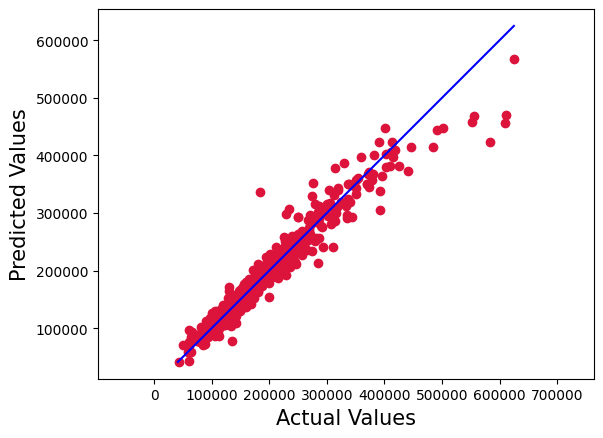

In [16]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(cb_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-8-9e03f58b62ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-cb_pred),bins=100);


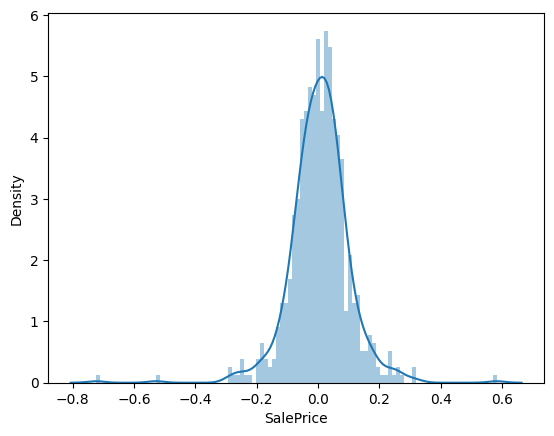

In [8]:
sb.distplot((y_test-cb_pred),bins=100);

In [9]:
# catboost optuna hyperparameter tuning
def objective(trial):
    # Define hyperparameter search space
    param = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
        "depth": trial.suggest_int("depth", 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.05, 1.0),
        "colsample_bylevel": trial.suggest_uniform("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }
    # Train model
    model = cb.CatBoostRegressor(**param)
    model.fit(x_train, y_train, eval_set=[(x_test, y_test)],  verbose=False)

    # Predict and evaluate
    predict = model.predict(x_test)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    return rmse  # Minimize RMSE

# Run Optuna optimization
study = optuna.create_study(direction='minimize')  # Minimize RMSE
study.optimize(objective, n_trials=50)

print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
# Print best hyperparameters
print("Best RMSE:", study.best_value)
print("Best Hyperparameters:", study.best_params)


[I 2025-03-24 17:57:06,209] A new study created in memory with name: no-name-46f826ca-c013-4bb9-9bbb-38eef435b100
<ipython-input-9-ed404377447c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.05, 1.0),
<ipython-input-9-ed404377447c>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bylevel": trial.suggest_uniform("colsample_bylevel", 0.05, 1.0),
[I 2025-03-24 17:57:08,104] Trial 0 finished with value: 0.11963102052956945 and parameters: {'iterations': 156, 'learning_rate': 0.0321979695423979, 'depth': 7, 'subsample': 0.09748858258092591, 'colsample_bylevel': 0.36736970304329736, 'min_data_in_leaf': 74}. Best is trial 0 with value: 0.11963102052

Number of finished trials: 50
Best trial:
Best RMSE: 0.0981807324704928
Best Hyperparameters: {'iterations': 499, 'learning_rate': 0.06964949308008792, 'depth': 5, 'subsample': 0.40836809051336526, 'colsample_bylevel': 0.5281683509957825, 'min_data_in_leaf': 64}


In [17]:
cb_mod = cb.CatBoostRegressor(iterations= 499, learning_rate= 0.06964949308008792, depth= 5, subsample= 0.40836809051336526, colsample_bylevel = 0.5281683509957825,
                              min_data_in_leaf = 64)
cb_mod.fit(x_train, y_train)
cb_pred = cb_mod.predict(x_test)

0:	learn: 0.3828878	total: 3.02ms	remaining: 1.51s
1:	learn: 0.3661099	total: 6.22ms	remaining: 1.55s
2:	learn: 0.3499259	total: 9.01ms	remaining: 1.49s
3:	learn: 0.3362352	total: 11.9ms	remaining: 1.48s
4:	learn: 0.3227996	total: 15ms	remaining: 1.48s
5:	learn: 0.3101898	total: 17.7ms	remaining: 1.46s
6:	learn: 0.2986617	total: 20.3ms	remaining: 1.42s
7:	learn: 0.2869782	total: 23ms	remaining: 1.41s
8:	learn: 0.2763781	total: 27.1ms	remaining: 1.48s
9:	learn: 0.2662881	total: 31.4ms	remaining: 1.54s
10:	learn: 0.2581673	total: 34.3ms	remaining: 1.52s
11:	learn: 0.2497054	total: 37.2ms	remaining: 1.51s
12:	learn: 0.2421414	total: 39.9ms	remaining: 1.49s
13:	learn: 0.2352319	total: 42.6ms	remaining: 1.47s
14:	learn: 0.2276121	total: 45.8ms	remaining: 1.48s
15:	learn: 0.2209761	total: 48.6ms	remaining: 1.47s
16:	learn: 0.2151299	total: 51.5ms	remaining: 1.46s
17:	learn: 0.2091626	total: 54.4ms	remaining: 1.45s
18:	learn: 0.2043518	total: 58.9ms	remaining: 1.49s
19:	learn: 0.2001893	total

In [18]:
cb_mod_sc=cb_mod.score(x_train,y_train)
print('CB Regression Model Score  : ',round(cb_mod_sc,3))
r2=r2_score(y_test,cb_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,cb_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,cb_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, cb_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(cb_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") #(91.23)
# Accuracy of moadel based on parameter supplied by optuna

CB Regression Model Score  :  0.97
R Sq. Value :  0.95
Adjusted R Sq. Value is :  0.943
Mean Square Error is :  0.01
Root Mean Square Error is :  0.097
Mean Absoulue Error is :  0.069
0:	learn: 0.3839512	total: 8.44ms	remaining: 4.2s
1:	learn: 0.3671716	total: 17.1ms	remaining: 4.25s
2:	learn: 0.3515894	total: 25.2ms	remaining: 4.17s
3:	learn: 0.3375490	total: 32.7ms	remaining: 4.04s
4:	learn: 0.3234901	total: 38.9ms	remaining: 3.84s
5:	learn: 0.3110801	total: 46.1ms	remaining: 3.79s
6:	learn: 0.2981216	total: 54.5ms	remaining: 3.83s
7:	learn: 0.2859951	total: 62.9ms	remaining: 3.86s
8:	learn: 0.2755563	total: 68.6ms	remaining: 3.73s
9:	learn: 0.2650391	total: 77.6ms	remaining: 3.8s
10:	learn: 0.2562824	total: 84.2ms	remaining: 3.74s
11:	learn: 0.2478657	total: 88.4ms	remaining: 3.59s
12:	learn: 0.2403169	total: 97.8ms	remaining: 3.65s
13:	learn: 0.2331876	total: 106ms	remaining: 3.67s
14:	learn: 0.2255532	total: 110ms	remaining: 3.55s
15:	learn: 0.2188793	total: 118ms	remaining: 3.57s

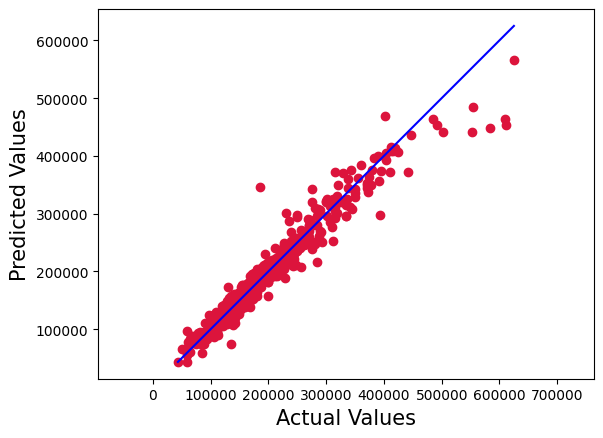

In [19]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(cb_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-20-9e03f58b62ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-cb_pred),bins=100);


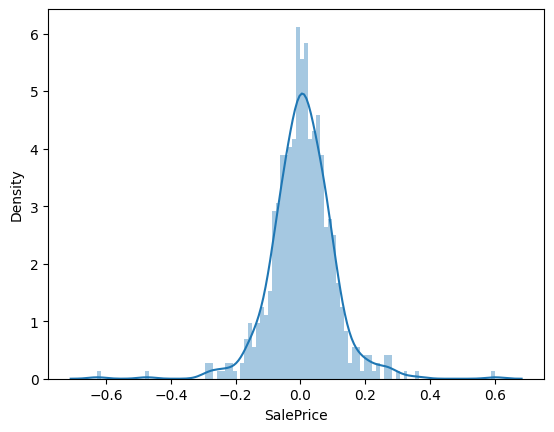

In [20]:
sb.distplot((y_test-cb_pred),bins=100);

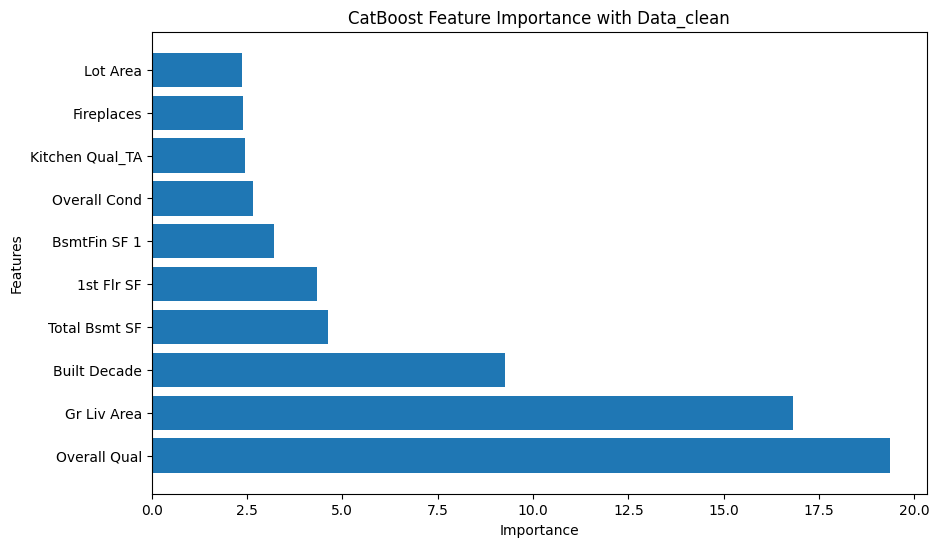

In [23]:
importances = cb_mod.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=x.columns).sort_values(ascending = False)[:10]
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance with Data_clean')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()